In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid', font_scale=1.2)

In [22]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [265]:
sns.set_style({'font.family':'sans-serif', 'font.serif':'Tahoma'})

In [2]:
accs = pd.read_csv('./results/acc_results.csv',index_col=0)

In [58]:
acc_n = pd.DataFrame()

In [129]:
acc_n = pd.DataFrame()
i = 0 
for col in accs.columns:
    temp = col.split('_')
    acc = pd.DataFrame(np.array(accs.iloc[:,i]),columns=['acc'])
    acc.insert(acc.shape[1],'model',temp[0])
    acc.insert(acc.shape[1],'shuffle',temp[1]=='S')
    acc.insert(acc.shape[1],'set',temp[2])
    acc.insert(acc.shape[1],'classification',accs.index)
    acc_n = pd.concat([acc_n,acc])
    i += 1


In [131]:
acc_n.to_csv('./results/acc_n.csv',index=False)

In [218]:
acc_n

,acc,model,shuffle,set,classification
0,0.992,RC,True,Tr,binary_6
1,1.000,RC,True,Tr,multi_6
2,0.985,RC,True,Tr,2-6_6
3,1.000,RC,True,Tr,1-6_6
4,0.997,RC,True,Tr,1-2_6
...,...,...,...,...,...
10,0.915,A,False,T,binary_5
11,0.551,A,False,T,multi_5
12,0.640,A,False,T,2-6_5
13,0.775,A,False,T,1-6_5


In [136]:
#ind = np.range()
accs.iloc[0,::6].index

Index(['cnn1d_shuffle_train', 'cnn1d_parallel_shuffle_train',
       'cnn1d_residual_shuffle_train', 'XGBoost_shuffle_train',
       'SVM_shuffle_train', 'ANN_shuffle_train'],
      dtype='object')

In [148]:
titles = ['shuffle_train','shuffle_valid','shuffle_test','noshuffle_train','noshuffle_valid','noshuffle_test']
xlab = ['C','CP','CR','X','S','A']

binary_6


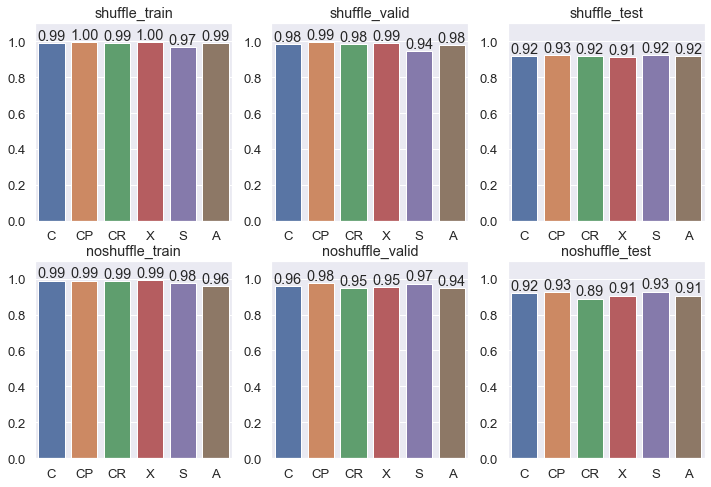

multi_6


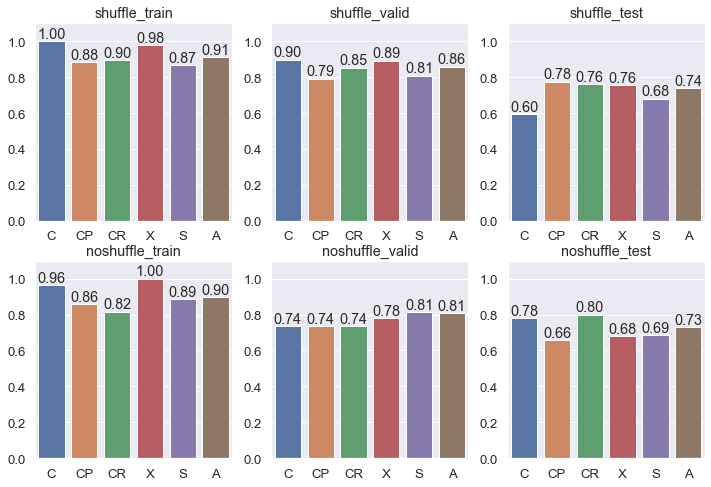

2-6_6


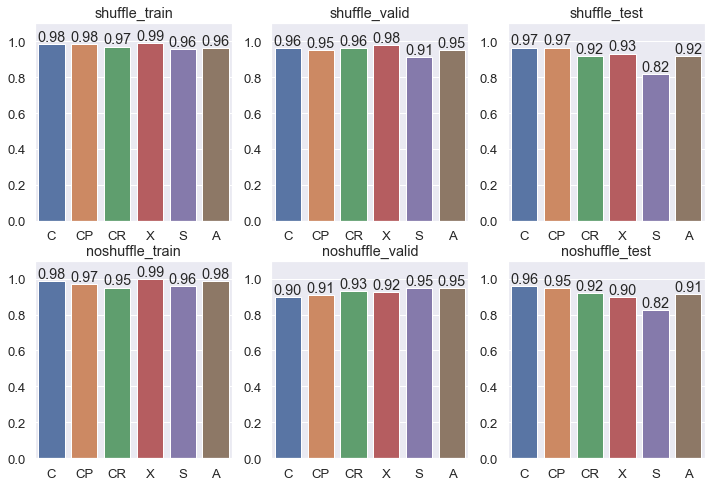

1-6_6


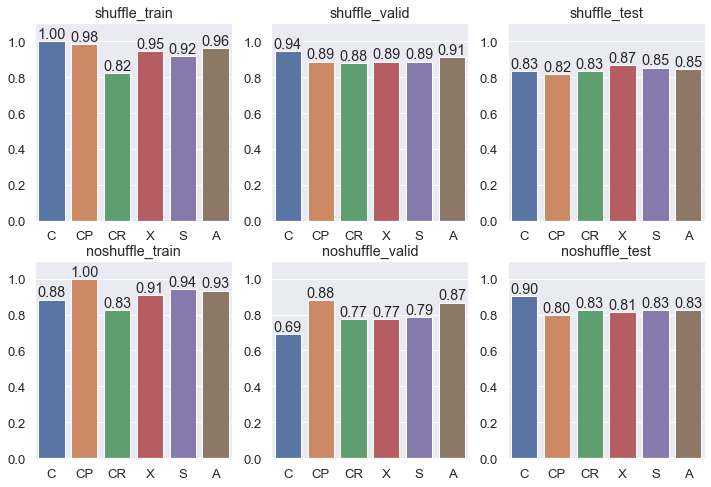

1-2_6


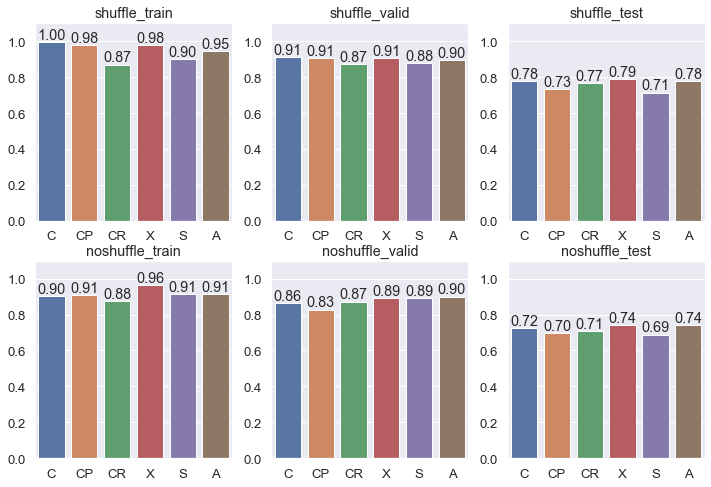

binary_7


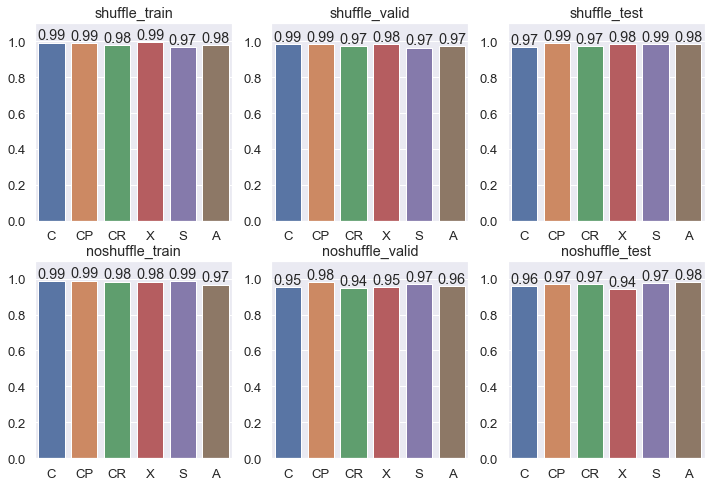

multi_7


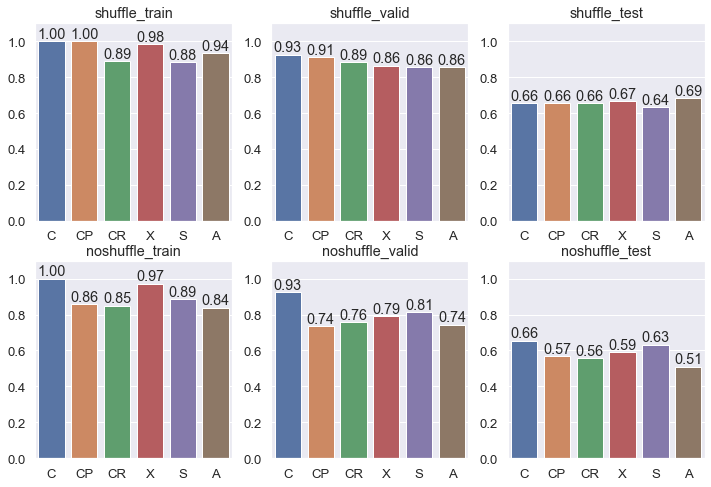

2-6_7


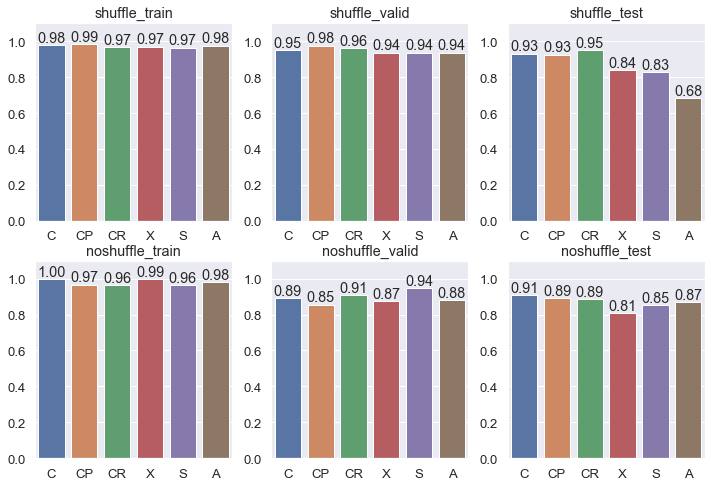

1-6_7


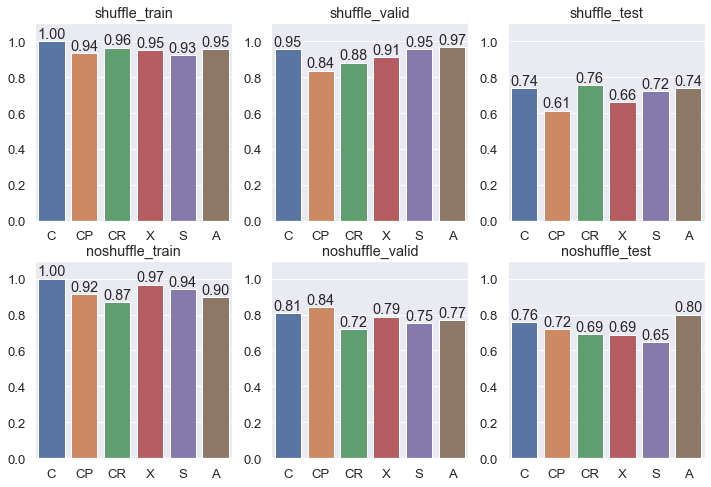

1-2_7


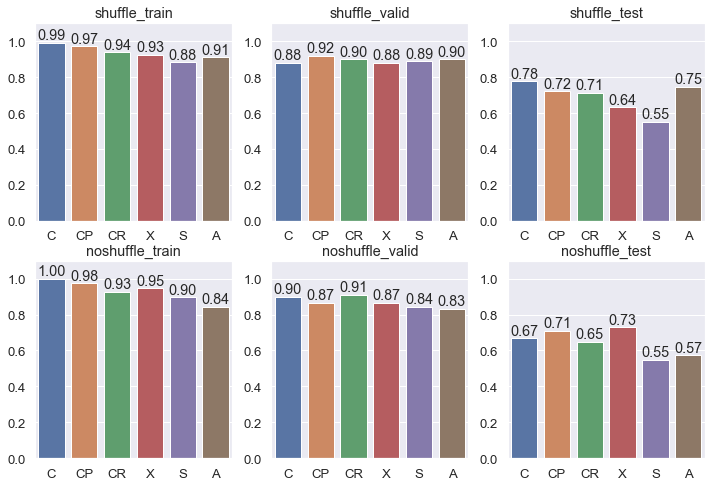

binary_5


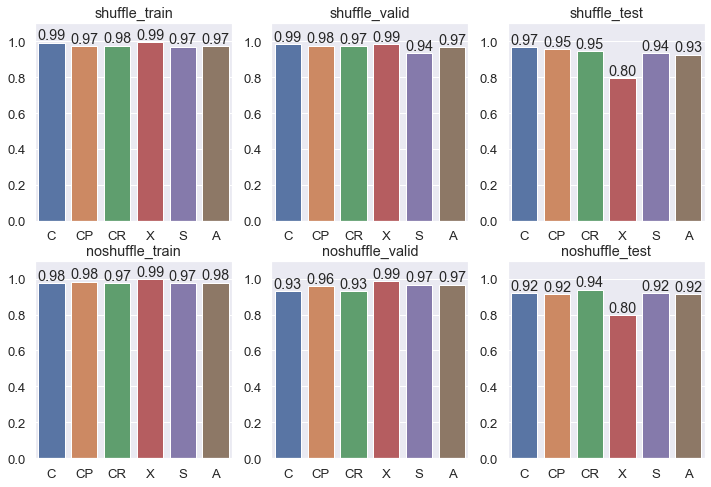

multi_5


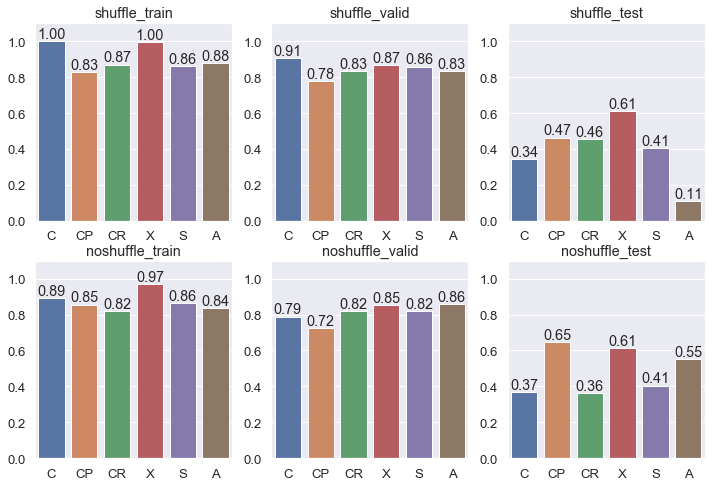

2-6_5


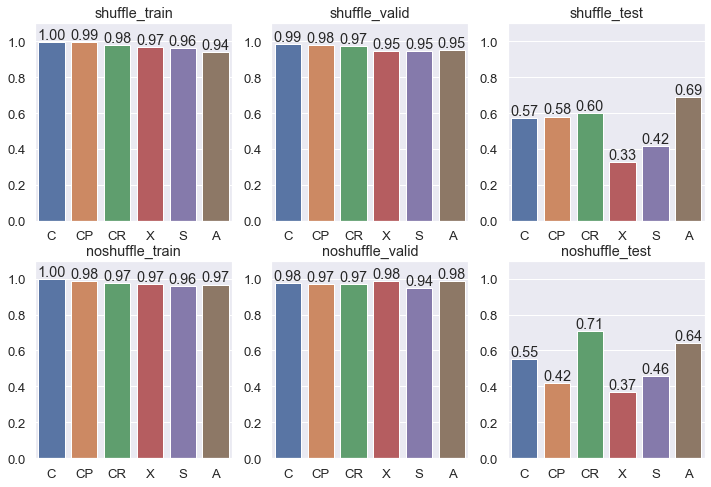

1-6_5


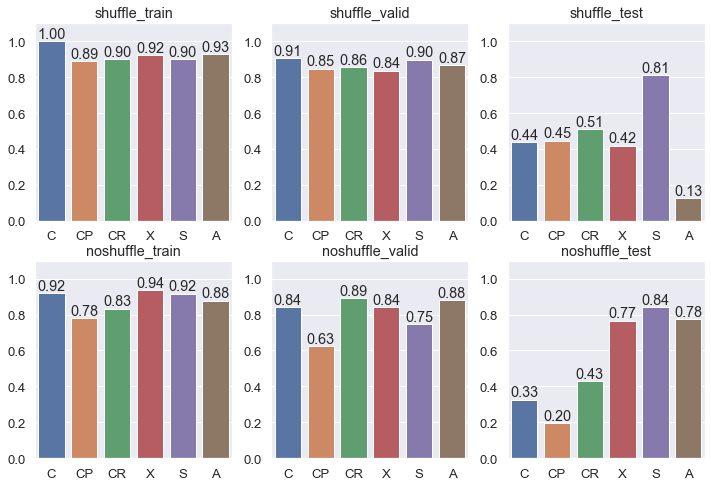

1-2_5


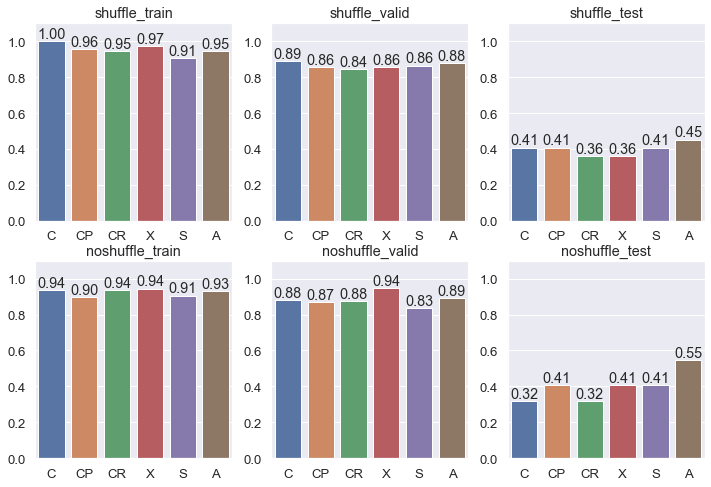

In [165]:
for j in range(len(accs.index)):
    print(accs.index[j])
    plt.figure(figsize=(12,8))
    for i in range(0,6):
        X = np.arange(0,6)
        Y = accs.iloc[j,i::6]
        plt.subplot(2,3,i+1)
        ax = sns.barplot(xlab,Y)
        plt.ylabel('')
        # plt.yticks(np.arange(0,1.1,0.1))
        plt.ylim((0,1.1))
        plt.title(titles[i])
        for x,y in zip(X,Y):
            plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

    plt.savefig('./pic/acc/'+accs.index[j]+".svg", format="svg",bbox_inches='tight')
    plt.show()

binary_6


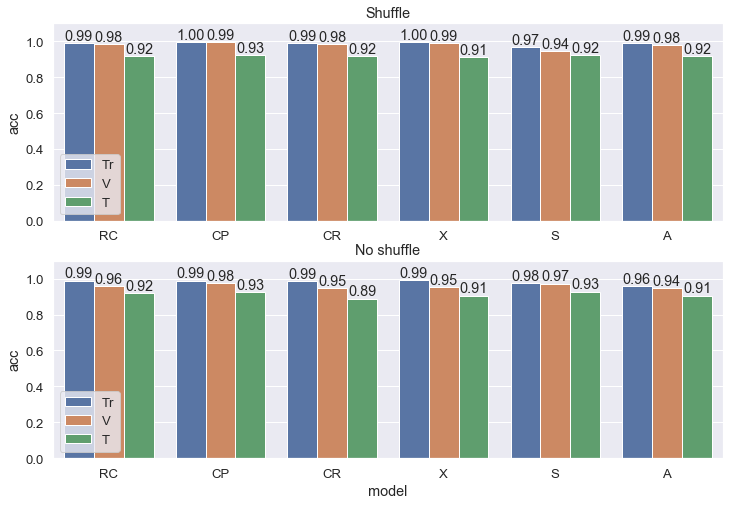

multi_6


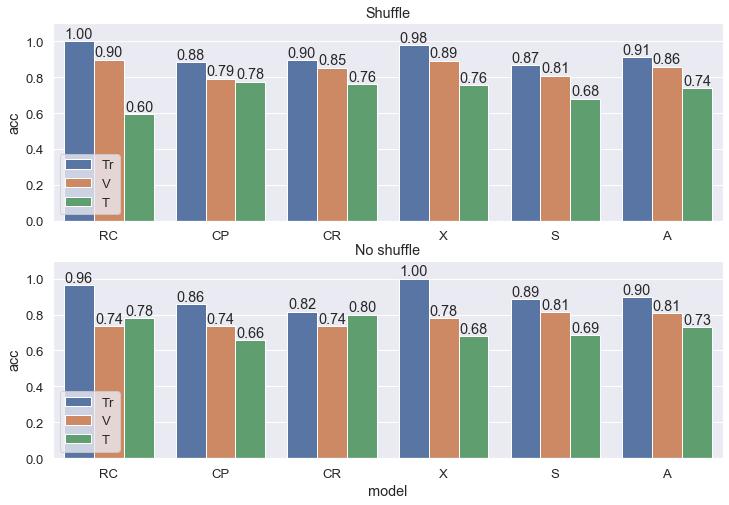

2-6_6


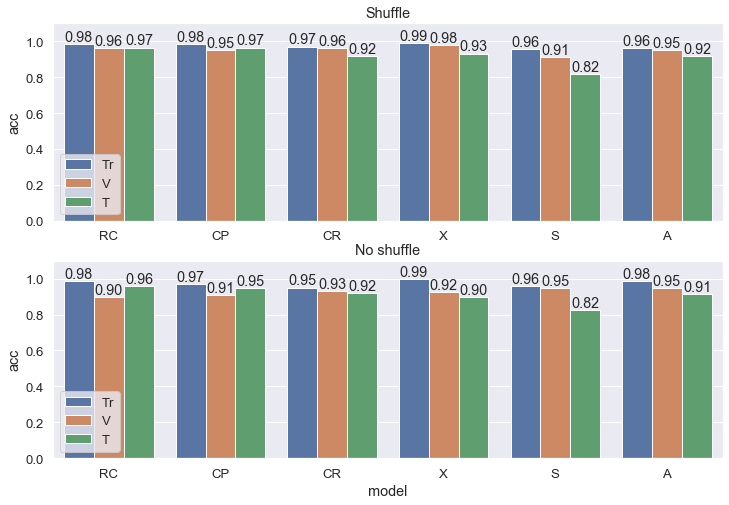

1-6_6


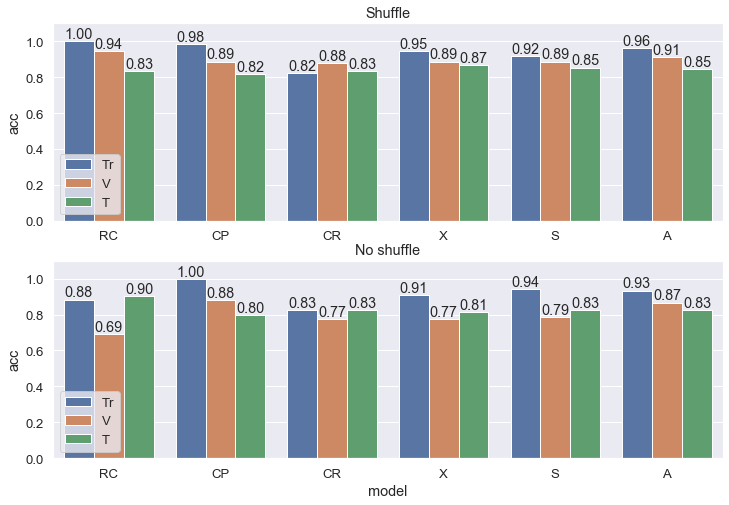

1-2_6


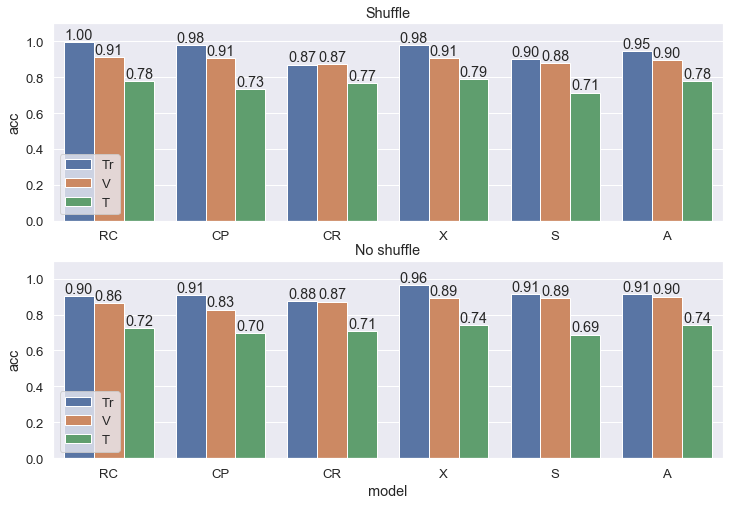

binary_7


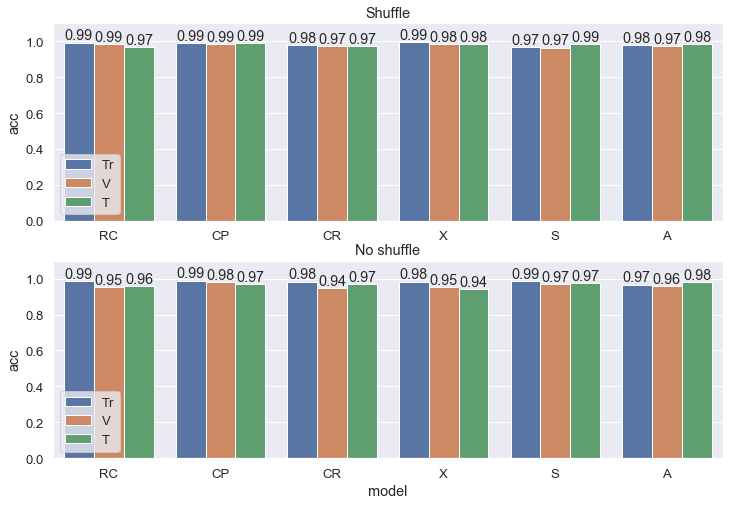

multi_7


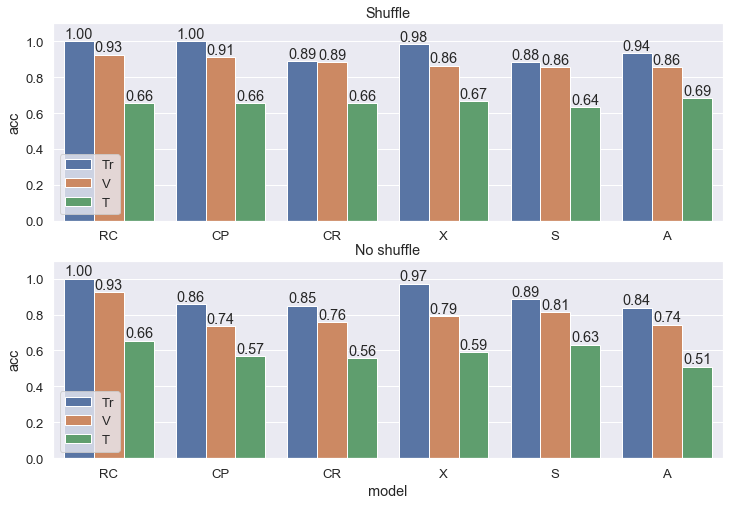

2-6_7


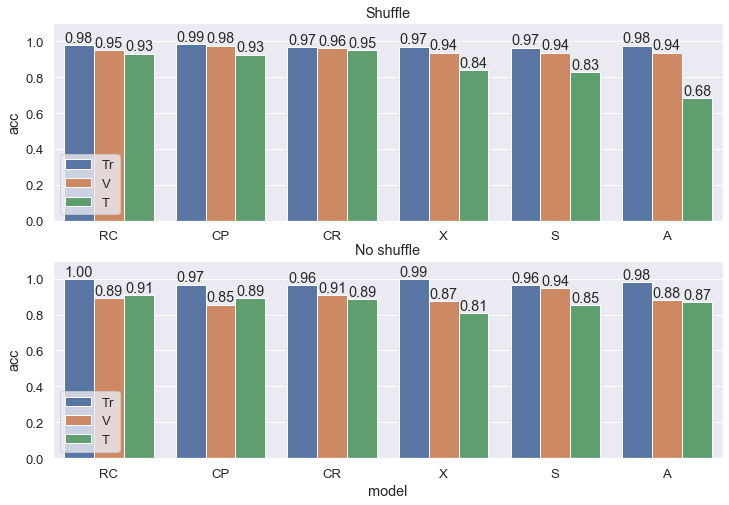

1-6_7


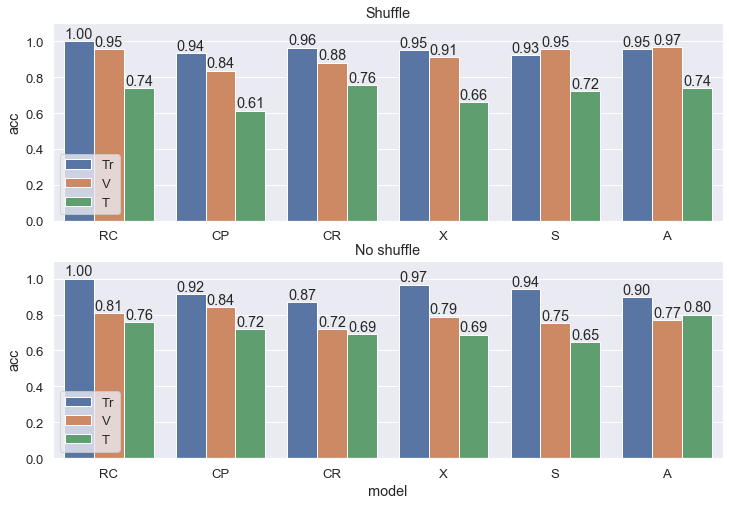

1-2_7


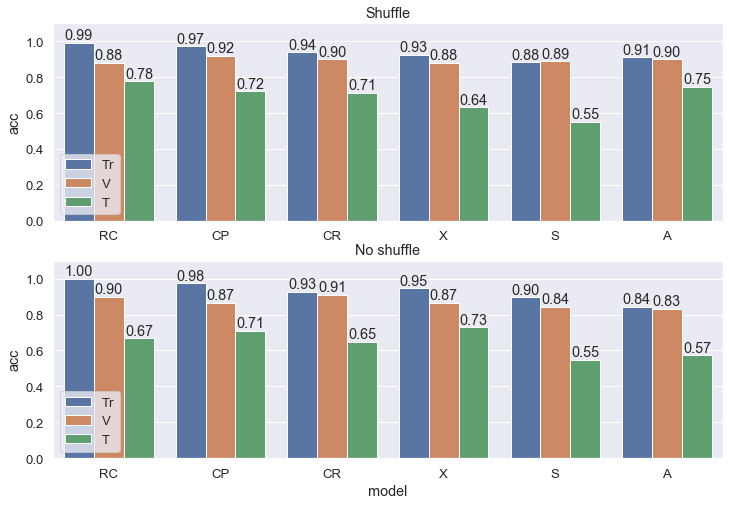

binary_5


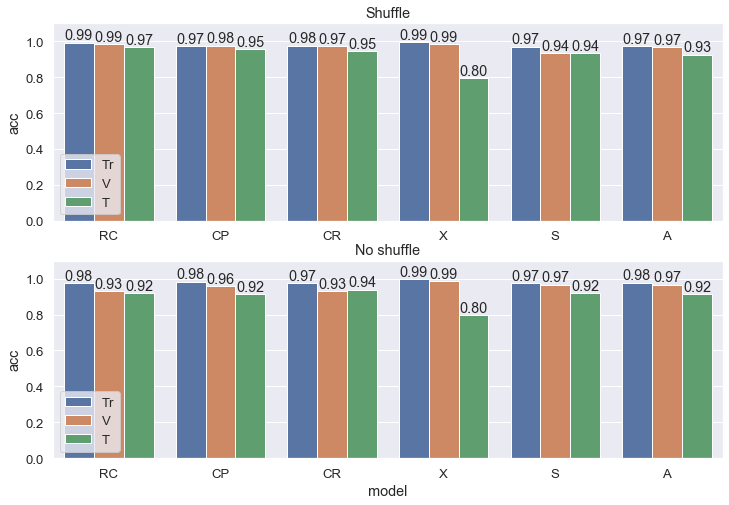

multi_5


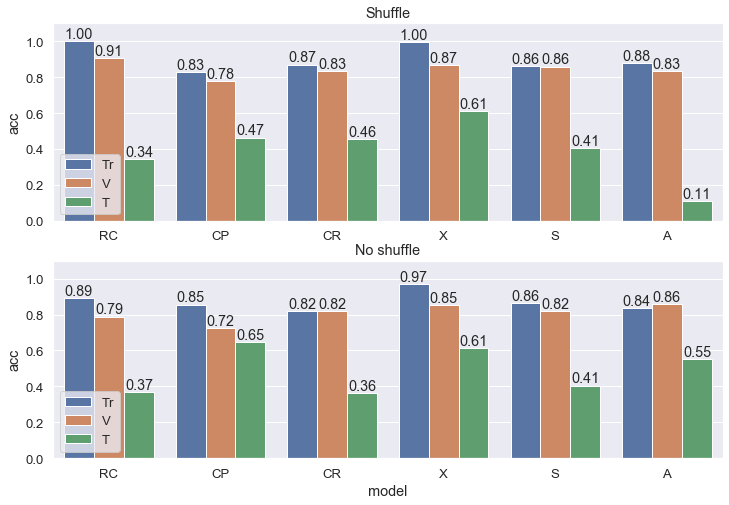

2-6_5


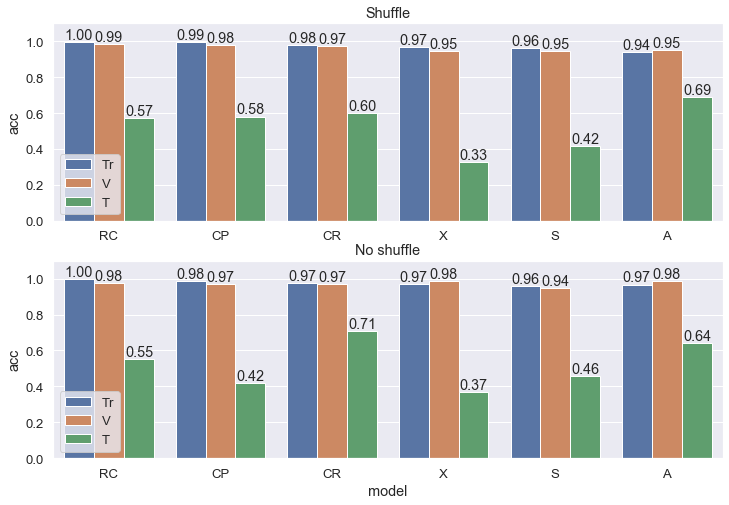

1-6_5


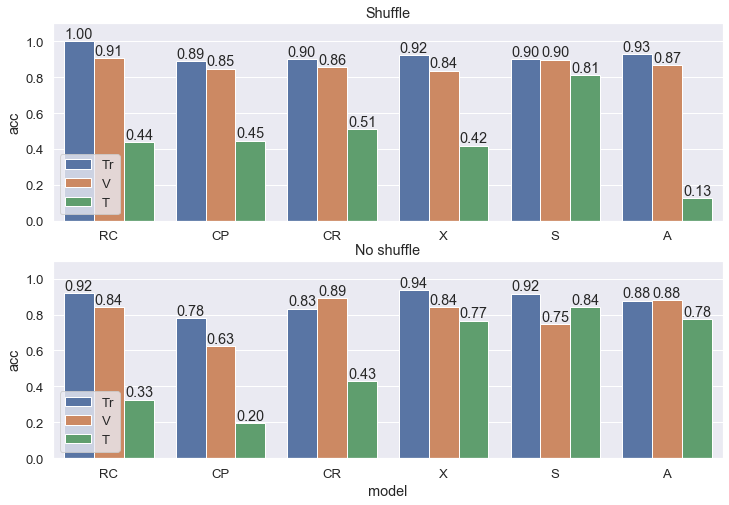

1-2_5


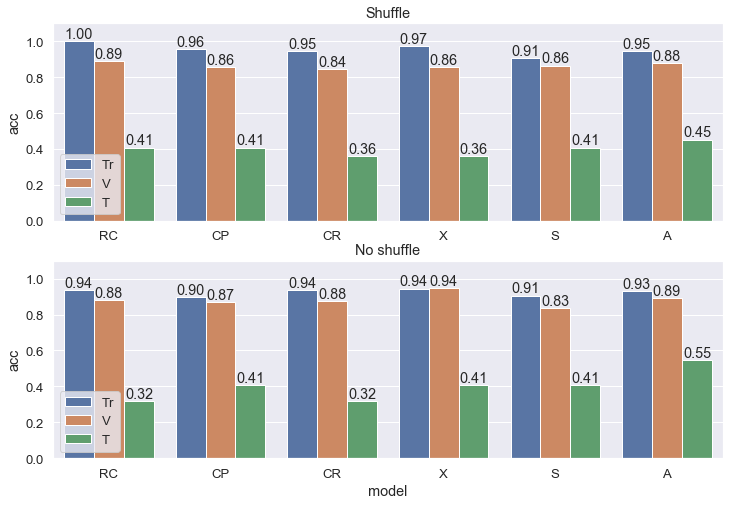

In [233]:
for i in acc_n.iloc[:15,-1]:
    print(i)
    plt.figure(figsize=(12,8))
    for j in range(2):
        ind = (acc_n.shuffle==True) & (acc_n.classification==i) if j == 0 else (acc_n.shuffle==False) & (acc_n.classification==i)
        
        X = [0-0.27,0,0.27,1-0.27,1,1.27,2-0.27,2,2.27,3-.27,3,3.27,4-.27,4,4.27,5-.27,5,5.27]
        Y = acc_n.loc[ind,'acc']
        
        plt.subplot(2,1,j+1)
        ax=sns.barplot(x='model',y='acc',hue='set',data=acc_n.loc[ind,:])
        if j == 0:
            plt.xlabel('')
        plt.legend(loc='lower left')
        plt.title('Shuffle' if j ==0 else 'No shuffle')
        plt.ylim([0,1.1])
        for x,y in zip(X,Y):
            plt.text(x,y,'%.2f' %y, ha='center',va='bottom')
    plt.savefig('./pic/acc/'+i+"_n.svg", format="svg",bbox_inches='tight')
    plt.show()

In [222]:
a = 1 if 2>3 else 2

In [223]:
a

2

In [8]:
cols = ['RC_S_Tr','RC_S_V','RC_S_T','RC_N_Tr','RC_N_V','RC_N_T',
         'CP_S_Tr','CP_S_V','CP_S_T','CP_N_Tr','CP_N_V','CP_N_T',
         'CR_S_Tr','CR_S_V','CR_S_T','CR_N_Tr','CR_N_V','CR_N_T',
         'X_S_Tr', 'X_S_V', 'X_S_T', 'X_N_Tr', 'X_N_V', 'X_N_T',
         'S_S_Tr', 'S_S_V', 'S_S_T', 'S_N_Tr', 'S_N_V', 'S_N_T',
         'A_S_Tr', 'A_S_V', 'A_S_T', 'A_N_Tr', 'A_N_V', 'A_N_T']

In [9]:
accs.columns=cols

In [253]:
ind_S = []
for col in cols:
    temp=col.split('_')
    ind_S += [True if temp[1] == 'N' else False]
    
ind_T = []
for col in cols:
    temp=col.split('_')
    ind_T += [True if temp[2] == 'V' else False]

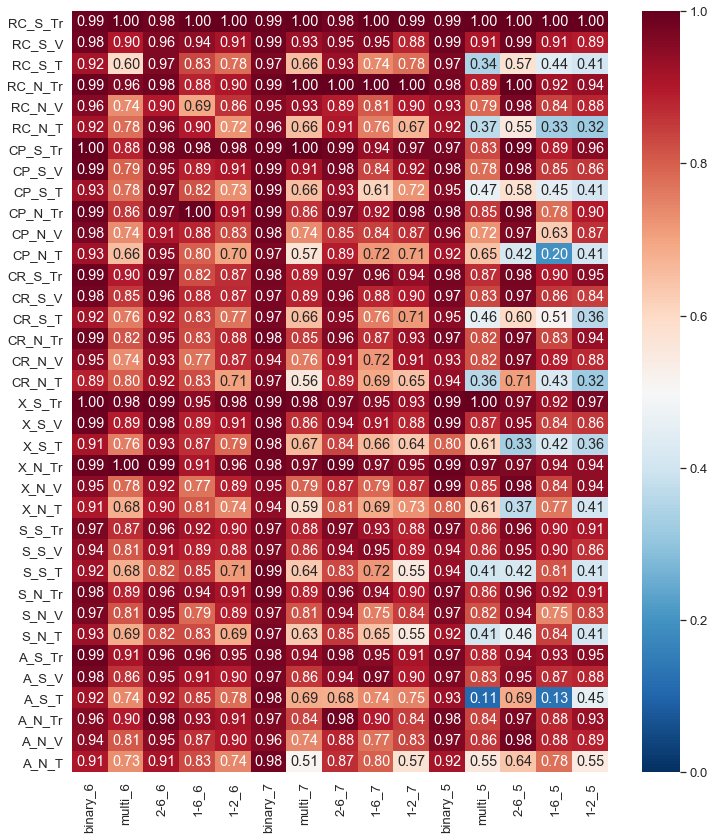

In [268]:
plt.figure(figsize=(12,14))
sns.heatmap(data=accs.T,annot=True,fmt='0.2f',cmap='RdBu_r',vmin=0,vmax=1)
# plt.title('No shuffle')
plt.savefig('./pic/acc/acc_summary.svg', format="svg",bbox_inches='tight')